# 0. Quality control 
The method introduced here is not robust to batch effects. 
Check that all histopathology slices you want to compare were imaged under similar conditions. 

Example: left and right are tissues imaged under different conditions --- possibly different microscopes.  
Visually, the patches differ in sharpness and hue --- however, do not trust your eyes!  
Display settings are not representative of [numerical pixel values](https://qupath.readthedocs.io/en/stable/docs/concepts/images.html#choosing-colors).  



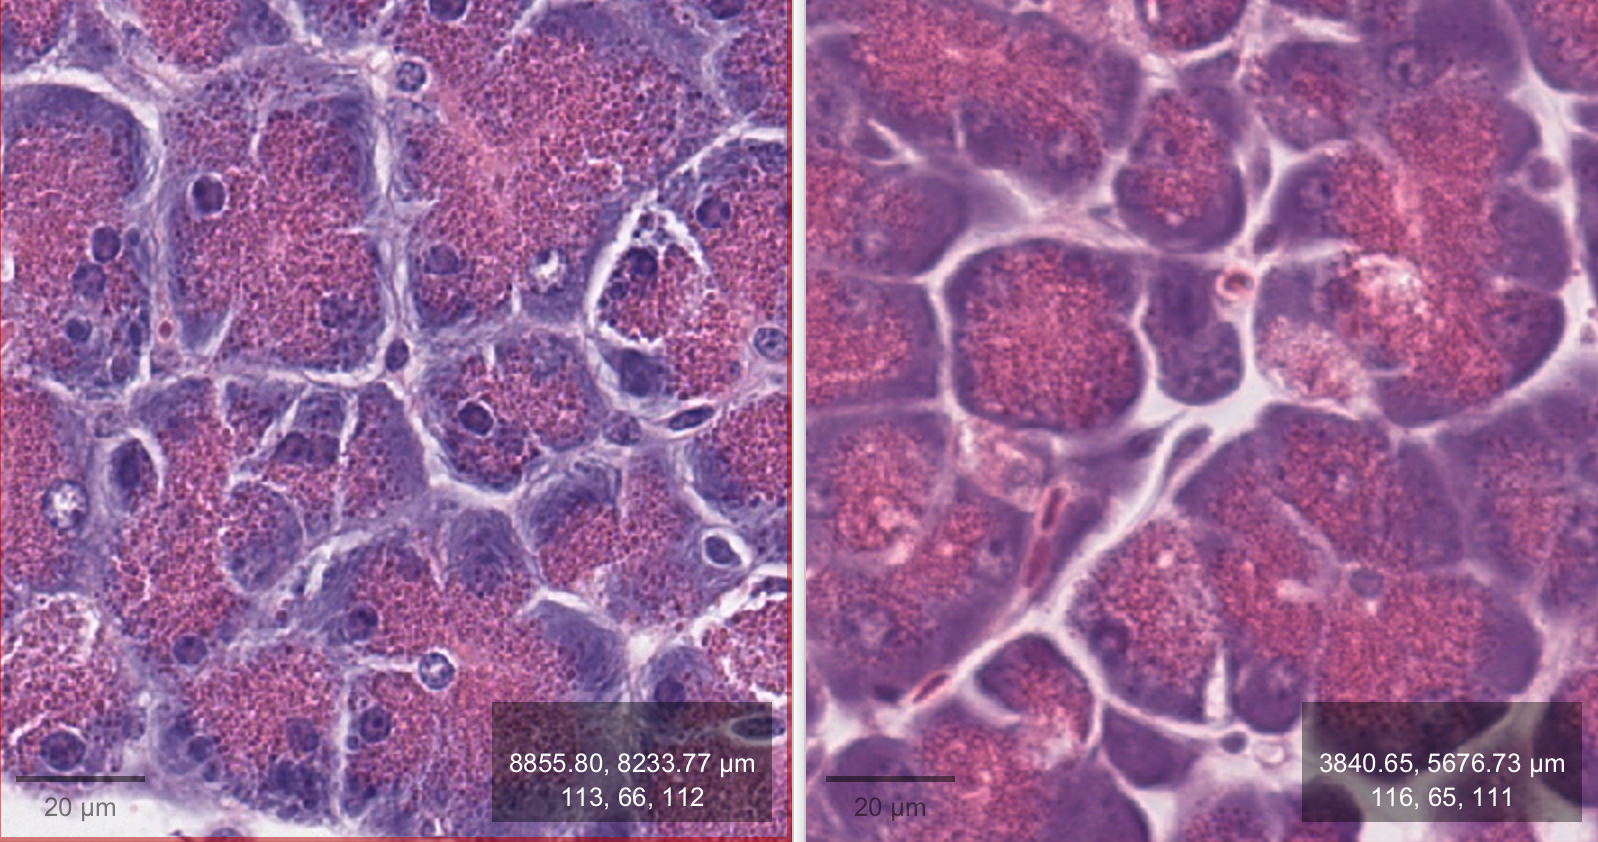

However, the pixelsize of the left and right image differed: 
0.263 um/px for the image on the left, which is typical for most images of the batch; and 0.254 um/px for the image on the right. 
Even when correcting calculations for the differences in pixel-size, the two images with a pixelsize of 0.254  
are outliers (circled below). These are not comparable, as they were imaged with different microscope settings. 

![Alt Text](./25868_healthy_and_sick.png)


Below is a groovy script that prints the pixelsizes and names of images. 
You can copy/paste it into the QuPath script editor, see [here](https://qupath.readthedocs.io/en/stable/docs/scripting/overview.html#custom-scripts) to learn how.  
When [running the script for all images](https://qupath.readthedocs.io/en/stable/docs/scripting/workflows_to_scripts.html#running-a-script-for-multiple-images), it prints the name and average pixelsize of each image --- allowing to scan for outliers in pixelsize. 

In [ ]:
def imageData = getCurrentImageData()
def entry = getProjectEntry()

pxsize = imageData.getServer().getPixelCalibration().getAveragedPixelSize()
name = entry.getImageName()

println (name + ", average pixelsize: " + pxsize)

## Final words
There are gazillion of ways in which an image should be excluded from analysis. 
In this example, differences in pixelsize were symptomatic of more ellusive differences in sample preparation. 

In your own case, pixelsize may not give outliers away. 

However no matter why you chose to exclude images, you should follow the following principle: 
Identify problematic images *before* running further analyses. Else you may find justifications for unexpected results, thus biasing the analysis. 